# Recesiones en México

Arthur Burns y Wesley Michell en 1946 en su libro "Measuring Bussiness Cycles" definen al ciclo económico como:

"…*las fluctuaciones en la actividad agregada de un país que se encuentra organizada en empresas de negocios*…"

**El ciclo económico clásico se caracteriza por tres fases principales:** 

I.	**Recesión**: es la etapa donde la actividad económica comienza a disminuir y termina cuando la actividad económica alcanza su punto más bajo. 

II.	**Recuperación**: comienza cuando la actividad económica comienza a crecer despues de una recesión y termina cuando la actividad alcanza el nivel del pico donde comenzó la recesión.

III. **Expansión**: Es cuando la actividad económica se está expandiendo y supera el nivel del pico de la recesión.


Un ciclo económico clásico se vería de la siguiente manera

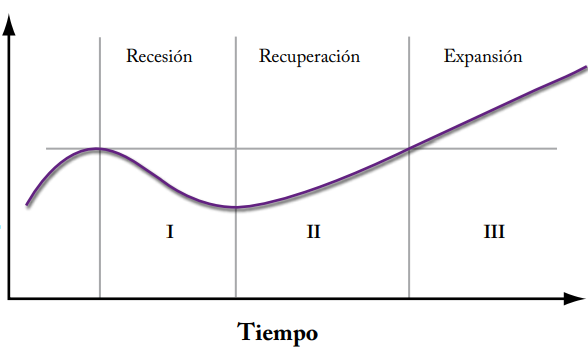

Fuente: Jonathan Heath (2012), Lo que indican los indicadores. Cómo utilizar la información estadística para entender la realidad económica de México. INEGI. versión electrónica: https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825003406

De acuerdo con el Cómite de Fechado de Ciclos de la Economía de México, han ocurrido las siguientes recesiones desde 1980 hasta la actualidad.

| | Recesión  | Fecha inicio    | Fecha Fin   | Duración   |
|---:|:-------------|:-----------|:------|:------|
| 1 | Crisis del 82 | Dic-1981       | Jun-1983   | 19 meses     |
| 2 | Crisis del 86  | Oct-1985    | Dic-1986   | 15 meses     |
| 3 | Crisis del 94  | Dic-1994    | May-1995   | 6 meses     |
| 4 | Crisis del 01  | Oct-2000    | Ene-2002   | 16 meses     |
| 5 | Crisis del 08  | Jul-2008    | May-2009   | 11 meses     |
| 6 | Crisis del Covid | Jun-2019    | May-2020   | 12 meses     |

Por lo tanto en esta notebook se analizara el último ciclo económico de la economía mexicana. Pero antes de nuestro análisis graficaremos y veremos los ciclos de la economía mexicana y la evolución del PIB trimestral desestacionalizado.

**Antes que nada importamos las librerías básicas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

primero importamos los datos de los archivos que se adjuntan en esta tarea

In [2]:
## los datos mensuales de las recesiones
datos_rec = pd.read_excel('recesionmex.xlsx')

## los datos del PIB de México
pib_trim=pd.read_excel('pib_trim.xlsx')

In [3]:
datos_rec

,fecha,recesion
0,1980/01,0
1,1980/02,0
2,1980/03,0
3,1980/04,0
4,1980/05,0
...,...,...
505,2022/02,0
506,2022/03,0
507,2022/04,0
508,2022/05,0


In [4]:
pib_trim

,fecha,PIB
0,1980/03,7.477954e+06
1,1980/06,7.501150e+06
2,1980/09,7.677707e+06
3,1980/12,7.913464e+06
4,1981/03,8.155986e+06
...,...,...
165,2021/06,1.789327e+07
166,2021/09,1.779862e+07
167,2021/12,1.785390e+07
168,2022/03,1.805777e+07


asegurarse que las fechas sean fechas

In [5]:
## convertimos en fechas los datos de recesión
datos_rec['fecha']=pd.to_datetime(datos_rec['fecha'])
# convertimos en fechas los datos del PIB
pib_trim.fecha=pd.PeriodIndex(pib_trim.fecha, freq='Q')

In [6]:
#creamos un duplicado de los datos de recesión
datos_rec2=datos_rec.copy()

## recesiones es un 1, así que multiplicamos para que las areas gris lleguen cubra los limites del eje Y
datos_rec2['recesion']=datos_rec2['recesion']*pib_trim['PIB'].max()*1.1

In [7]:
datos_rec2

,fecha,recesion
0,1980-01-01,0.0
1,1980-02-01,0.0
2,1980-03-01,0.0
3,1980-04-01,0.0
4,1980-05-01,0.0
...,...,...
505,2022-02-01,0.0
506,2022-03-01,0.0
507,2022-04-01,0.0
508,2022-05-01,0.0


**Graficamos y sombreamos las recesiones**

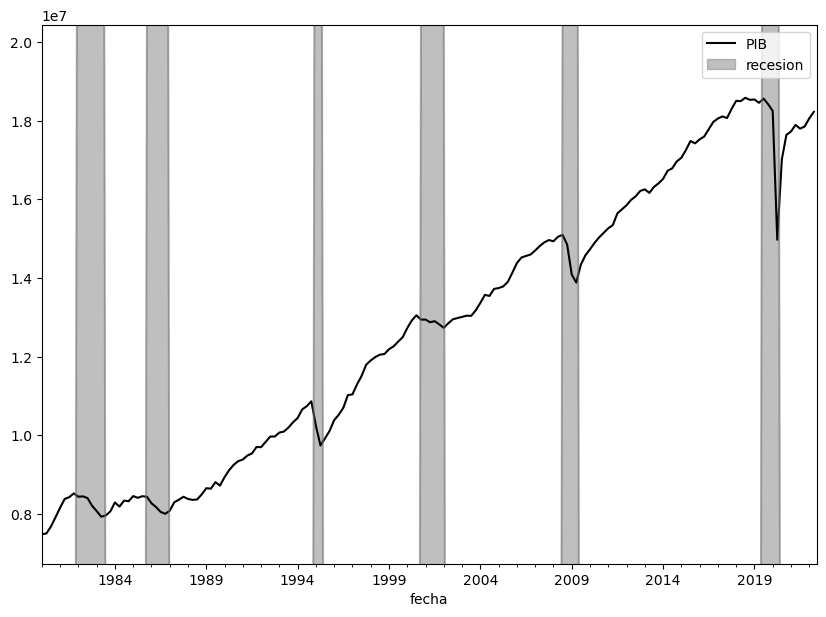

In [8]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
datos_rec2.plot.area(ax=ax, figsize=(10, 7), x='fecha', alpha=0.5, color="gray")
plt.ylim(pib_trim['PIB'].min()*0.9, pib_trim['PIB'].max()*1.1)
plt.show()

**Graficamos la última recesión de México**

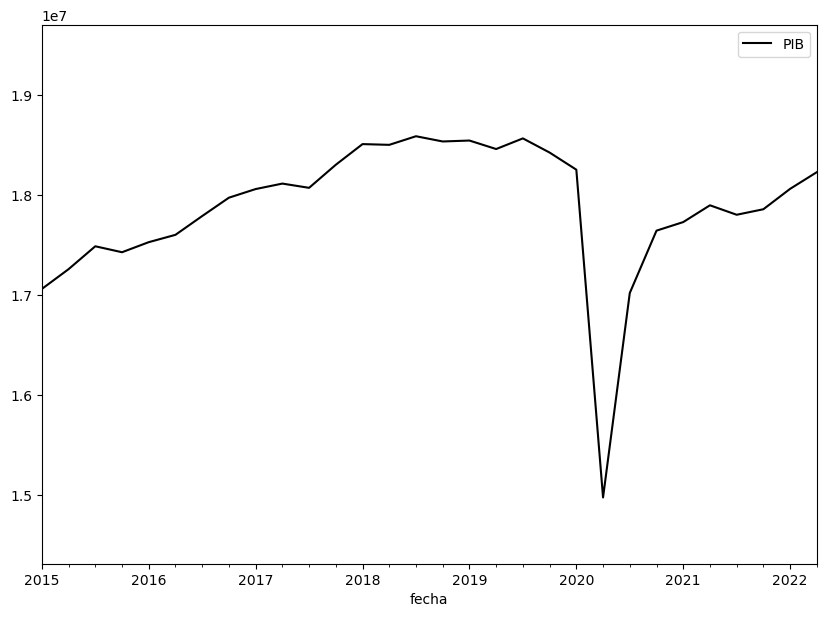

In [9]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim('2015-01-01', '2022-06-01')
plt.show()

como podras notar aun no se recupera el nivel del PIB que México tenia previo a la pandemia, la pregunta es **¿cuándo recuperara México el PIB previo de la recesión de la Pandemia?**

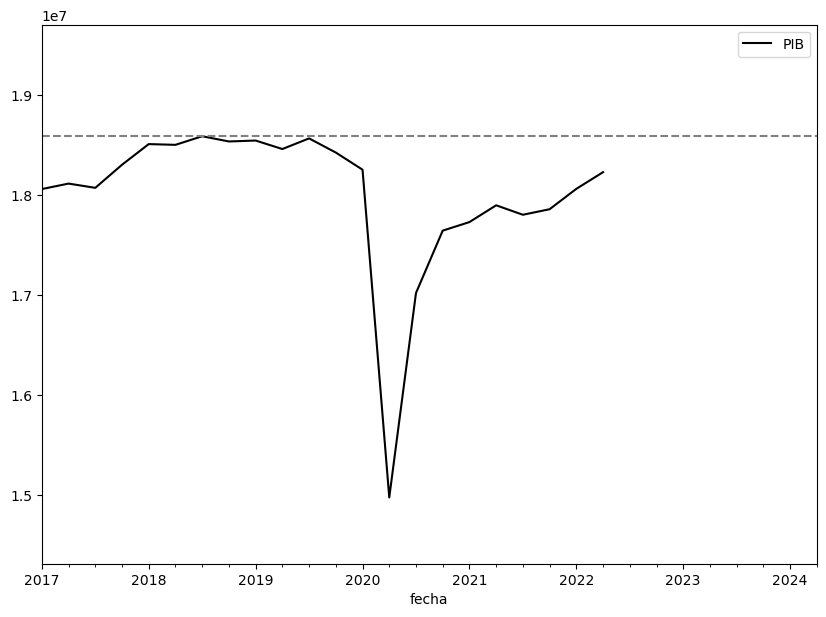

In [10]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
ax.axhline(y=pib_trim['PIB'].max(), color="gray", linestyle='--')
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim('2017-01-01', '2024-06-01')
plt.show()

Así que tu trabajo sera hacer un pronóstico de cuantos trimestres mas le tomará a la economía recuperar su nivel prepandemia y si esa recuperación ocurrirá al final del sexenio

Realiza lo siguiente:
1. Prueba de raíz unitaria para verificar que el PIB sea una serie estacionaria
2. En caso de que no lo sea diferencia el PIB y guardalo en un objeto llamado pib_diff
3. Realiza la prueba de raíz unitaria y verifica que la primera diferencia del PIB sea estacionario
4. Una vez que el PIB sea estacionario  realiza las gráficas de ACF y PACF para tratar de identificar el proceso, y plantea por lo menos tres procesos (solo plantearlos, no estimarlos)
5. Con base en la notebook "pronostico_arima" utiliza la función "*if*" para probar hasta un arma(6,6) de la series pib_diff
6. Si naciste en enero-junio utiliza el criterio bayesiano de información (BIC) para seleccionar el modelo, si naciste julio-diciembre utiliza el criterio de Akaike (AIC).


### Librerías a usar

In [11]:
# Importamos las librerías de manejo de datos
import numpy as np
import pandas as pd

# Immportamos las librerías de visualización de datos
import matplotlib.pyplot as plt

# Manejo de datos tipo fecha
import datetime as dt
%matplotlib inline

# Importamos las librerías de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

# Modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

### 1. Prueba de raíz unitaria para verificar que el PIB sea una serie estacionaria

In [12]:
# Para probar si la serie es estacionaria, tenemos la siguiente prueba de hipótesis.
# Prueba de Dickey-Fuller Aumentada.
# H0: Serie no estacionaria.

ADF_test1 = adfuller(pib_trim['PIB'])

# ADF Test para obtener el valor del p-value
print(f'ADF Statistic: {ADF_test1[0]}')
print(f'p-value: {ADF_test1[1]}')

# El grado de significancia del 5%.
alpha = 0.05

# Regla de decision.
if ADF_test1[1] < alpha:
    print('Se rechaza H0, la serie de tiempo es estacionaria.')
else:
    print('No se rechaza H0, la serie de tiempo no es estacionaria.')

ADF Statistic: -0.31787235358826044
p-value: 0.9229346531991021
No se rechaza H0, la serie de tiempo no es estacionaria.


### 2. En caso de que no lo sea diferencia el PIB y guardalo en un objeto llamado pib_diff

In [13]:
pib_trim['pib_diff'] = pib_trim['PIB'].diff()
pib_trim

,fecha,PIB,pib_diff
0,1980Q1,7.477954e+06,NaN
1,1980Q2,7.501150e+06,23196.019979
2,1980Q3,7.677707e+06,176556.367223
3,1980Q4,7.913464e+06,235757.117109
4,1981Q1,8.155986e+06,242521.879502
...,...,...,...
165,2021Q2,1.789327e+07,167830.277268
166,2021Q3,1.779862e+07,-94646.967531
167,2021Q4,1.785390e+07,55276.784448
168,2022Q1,1.805777e+07,203875.598971


In [14]:
# eliminamos columna por mal nombre
# pib_trim = pib_trim.drop(columns=['PIB_diferenciado'])
# pib_trim

### 3. Realiza la prueba de raíz unitaria y verifica que la primera diferencia del PIB sea estacionario

In [17]:
# Para probar si la serie es estacionaria, tenemos la siguiente prueba de hipótesis.
# Prueba de Dickey-Fuller Aumentada.
# H0: Serie no estacionaria.

ADF_test2 = adfuller(pib_trim['pib_diff'].dropna())

# ADF para obtener el valor del p-value
print(f'ADF statistics: {ADF_test2[0]}')
print(f'ADF p-value: {ADF_test2[1]}')

# La significancia es de 0.05%
alpha = 0.05

# Regla de decisión
if ADF_test2[1] < alpha:
    print("Se rechaza H0, la serie es estacionaria")
else:
    print("No se rechaza H0, la serie no es estacionaria")

ADF statistics: -10.938833151339615
ADF p-value: 9.408618418534971e-20
Se rechaza H0, la serie es estacionaria


### 4. Una vez que el PIB sea estacionario realiza las gráficas de ACF y PACF para tratar de identificar el proceso, y plantea por lo menos tres procesos (solo plantearlos, no estimarlos)

C:\Users\evanp\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


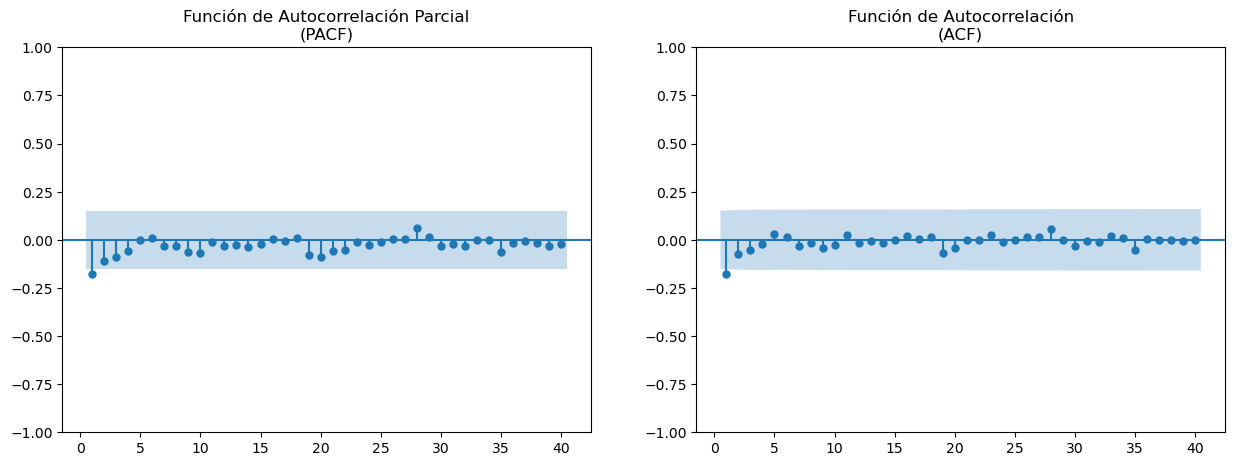

In [18]:
# identificamos qué tipo de proceso es
ig, ax = plt.subplots(1,2, figsize=(15,5))


plot_pacf(pib_trim['pib_diff'].dropna(), zero=False, lags=40, ax=ax[0], title="Función de Autocorrelación Parcial\n(PACF)")
ax[0].set_ylim(-1,1)
plot_acf(pib_trim['pib_diff'].dropna(), zero=False, lags=40, ax=ax[1],title="Función de Autocorrelación\n(ACF)")
ax[1].set_ylim(-1,1)
plt.show()

Planteamiento de modelos<br>
ARIMA(1,1,1)<br>
ARIMA(4,1,2)<br>
ARIMA(11,1,9)<br>

### 5. Con base en la notebook "pronostico_arima" utiliza la función "ic" para probar hasta un arma(6,6) de la series pib_diff

In [83]:
# Estimaremos todos los modelos posibles y guardaremos los estadísticos AIC y BIC.
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(pib_trim['PIB'].dropna(), order=(ar, 1, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
# para utilizar la inflacion_diferenciado tendriamos que cambiar en el order(ar,0,ma)

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 3


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 4


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 5


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 2


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 3


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 4


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 5


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 5


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 3


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 4


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\s

AR: 6, MA: 4


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\evanp\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 6


C:\Users\evanp\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 6. Si naciste en enero-junio utiliza el criterio bayesiano de información (BIC) para seleccionar el modelo, si naciste julio-diciembre utiliza el criterio de Akaike (AIC).

In [84]:
ic.sort_values("BIC",ascending=True).head(3)

,,AIC,BIC
AR,MA,,
0,0,4788.521670,4791.651569
1,0,4789.817349,4796.077146
0,1,4789.821056,4796.080853


**los siguientes códigos son para ayudarte a estimar tu modelo**

In [89]:
#ejecuta el siguiente modelo definiendo el orden ARIMA (p,I,q) que sugieren los pasos anteriores
# yo aleatoriamente elegí un arima(1,1,1)
p=1
I=1
q=2

results=0
model = ARIMA(pib_trim['PIB'],order=(p,I,q))
resultado = model.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                    PIB   No. Observations:                  170
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2390.057
Date:                Thu, 11 May 2023   AIC                           4788.114
Time:                        19:41:52   BIC                           4800.634
Sample:                             0   HQIC                          4793.195
                                - 170                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.005    182.353      0.000       0.989       1.011
ma.L1         -1.0482      0.031    -33.667      0.000      -1.109      -0.987
ma.L2          0.0493      0.025      1.982      0.0

In [41]:
## nota que la serie de tiempo el primer trimestre de 1980 es 0, 
## y el segundo trimestre de 2022 es 169
pib_trim

,fecha,PIB,pib_diff
0,1980Q1,7.477954e+06,NaN
1,1980Q2,7.501150e+06,23196.019979
2,1980Q3,7.677707e+06,176556.367223
3,1980Q4,7.913464e+06,235757.117109
4,1981Q1,8.155986e+06,242521.879502
...,...,...,...
165,2021Q2,1.789327e+07,167830.277268
166,2021Q3,1.779862e+07,-94646.967531
167,2021Q4,1.785390e+07,55276.784448
168,2022Q1,1.805777e+07,203875.598971


por tanto nosotros queremos graficar el tercer trimestre de 2022 (170), el cuarto trimestre de 2022 (171), etc.

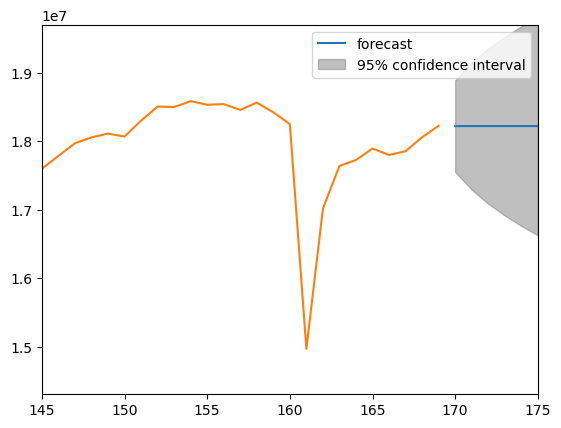

In [68]:
# graficamente esto es lo que buscamos
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(resultado, start=170,end=175)
plt.plot(pib_trim['PIB'])
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim(145,175)
plt.show()


In [65]:
## el valor máximo lo podemos buscar de forma sencilla con 
pib_trim['PIB'].max()

18583728.7115077

pronosticamos dos años

In [90]:
resultado.predict(170,178).round(2)

170    18281377.04
171    18343563.83
172    18405746.30
173    18467924.46
174    18530098.31
175    18592267.85
176    18654433.08
177    18716594.00
178    18778750.62
Name: predicted_mean, dtype: float64

creamos un duplicado

verificamos en que trimestre se alcanza otra vez el valor máximo, y anoten en la conclusion que trimestre se alcanza (recuerden que es un intervalo de 95% de confianza)

Nos encontramos que en los siguientes trimestres el PIB de México, se predice irá en aumento y alcanzará el punto máximo (que fue en 2018Q3) para el cuarto y último trimestre de 2023 (175), con un valor de 18,592,267.85

Añade nombre, matricula y grupo


<b>Andrea Carolina López Ruiz <br>
#M: 1902969<br>
Grupo:43</b>